In [149]:
import pandas as pd
import numpy as np

import math
from functools import reduce
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

from progressbar import ProgressBar

# Грузим дату

In [2]:
events = pd.DataFrame.from_csv('user_activity.csv', index_col=None)
events_test = pd.DataFrame.from_csv('user_activity_test.csv', index_col=None)
structure = pd.DataFrame.from_csv('structure.csv', index_col='step_id')
targets = pd.DataFrame.from_csv('targets.csv', index_col='user_id')

In [3]:
events.sort_values('time', inplace=True)
events_test.sort_values('time', inplace=True)

In [4]:
events.head()

,user_id,action,step_id,time,step_type,step_cost
0,5920,discovered,2681,1403165936,text,0
1,5920,passed,2681,1403165936,text,0
2,5920,viewed,2681,1403165936,text,0
3,5920,passed,2682,1403165946,text,0
4,5920,viewed,2682,1403165946,text,0


In [5]:
events_test.head()

,user_id,action,step_id,time,step_type,step_cost
0,20698,passed,7225,1410725206,text,0
1,20698,viewed,7225,1410725206,text,0
2,20698,discovered,7225,1410725206,text,0
3,20698,passed,7230,1410725214,text,0
4,20698,discovered,7230,1410725214,text,0


In [6]:
structure.head()

,course_id,module_id,module_position,lesson_id,lesson_position,step_position,step_type,step_cost
step_id,,,,,,,,
7225,7,17,1,2721,1,1,text,0
7230,7,17,1,2721,1,2,text,0
7231,7,17,1,2721,1,3,text,0
7232,7,17,1,2721,1,4,text,0
43604,7,17,1,2721,1,5,text,0


In [7]:
targets.head()

,score,passed,distinction
user_id,,,
1,0,0,0
2,82,0,0
3,89,0,0
4,9,0,0
6,26,0,0


# Тыкаем данные

In [8]:
D = pd.concat([events[events.action == 'passed'].groupby('user_id').sum(), targets], axis=1).sort_values('step_cost', ascending=False)
U = D.index
D1 = pd.concat([events[events.action == 'passed'].groupby('user_id').sum(), targets], axis=1).sort_values('score', ascending=False)
U1 = D1.index

In [9]:
def step_id_position(i):
    metadata = structure.loc[i]
    return (metadata.module_position, metadata.lesson_position, metadata.step_position)

In [10]:
events.groupby('user_id').head().head()

,user_id,action,step_id,time,step_type,step_cost
0,5920,discovered,2681,1403165936,text,0
1,5920,passed,2681,1403165936,text,0
2,5920,viewed,2681,1403165936,text,0
3,5920,passed,2682,1403165946,text,0
4,5920,viewed,2682,1403165946,text,0


In [11]:
targets[targets.passed == 1].sort_values('score').head(1)

,score,passed,distinction
user_id,,,
7288,91,1,0


In [12]:
min_score_to_pass = 91

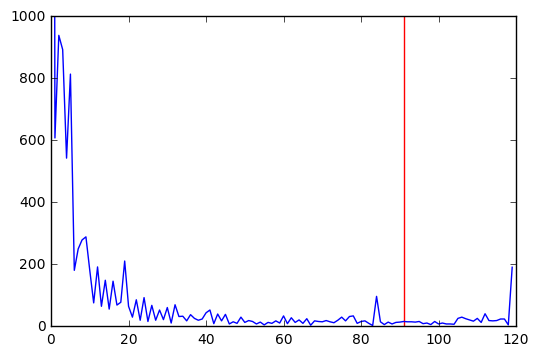

In [13]:
plt.ylim(0, 1000)
plt.vlines(min_score_to_pass, 0, 1000, 'r')
plt.plot(targets.score.value_counts().sort_index().values)

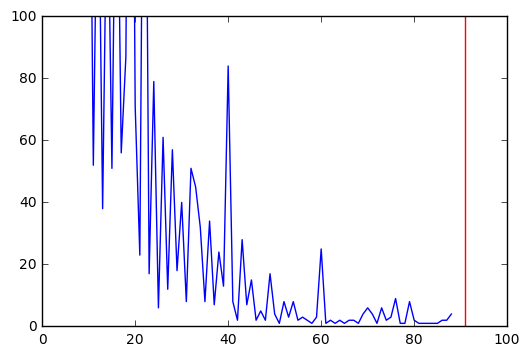

In [14]:
plt.ylim(0, 100)
plt.vlines(min_score_to_pass, 0, 1000, 'r')
plt.plot(D.step_cost.value_counts().sort_index().values)

In [15]:
targets.passed.sum(), targets.passed.shape[0], targets.passed.sum() / targets.passed.shape[0]

(659, 16625, 0.039639097744360904)

In [16]:
len(set(events.user_id) & set(targets.index))

16625

In [17]:
len(set(events_test.user_id) & set(targets.index))

0

In [18]:
good_users = targets[targets.passed == 1].index

In [19]:
len(good_users)

659

In [20]:
targets.loc[good_users[0]]

score          119
passed           1
distinction      1
Name: 7, dtype: int64

In [21]:
((targets.passed == 1) & (targets.distinction == 0)).sum()

186

In [22]:
targets[(targets.passed == 1) & (targets.distinction == 1)].sort_values('score').head(1)

,score,passed,distinction
user_id,,,
6578,106,1,1


In [23]:
# D – sorted by step_cost
# D1 – sorted by score

In [24]:
D.head(25)

,step_id,time,step_cost,score,passed,distinction
user_id,,,,,,
3092,4437695.0,5.167492e+11,119.0,119,1,1
5141,4437695.0,5.154972e+11,119.0,119,1,1
961,4437695.0,5.162974e+11,119.0,119,1,1
4818,4437695.0,5.156613e+11,119.0,119,1,1
4814,4222155.0,4.864321e+11,115.0,115,1,1
5133,1859848.0,1.660069e+11,115.0,115,1,1
5657,4150066.0,5.061647e+11,109.0,109,1,1
309,4259305.0,4.931505e+11,109.0,119,1,1
698,4161284.0,4.812657e+11,102.0,119,1,1


In [25]:
D1.head(25)

,step_id,time,step_cost,score,passed,distinction
user_id,,,,,,
7274,14455.0,2.848591e+09,0.0,119,1,1
1056,1348328.0,1.399226e+11,24.0,119,1,1
7686,15141.0,4.301239e+09,0.0,119,1,1
586,299867.0,6.913297e+10,5.0,119,1,1
5387,1788636.0,2.207292e+11,40.0,119,1,1
5428,1788636.0,2.207223e+11,40.0,119,1,1
5514,1438814.0,1.529050e+11,26.0,119,1,1
5515,1429044.0,1.514897e+11,26.0,119,1,1
7092,200440.0,4.938861e+10,22.0,119,1,1


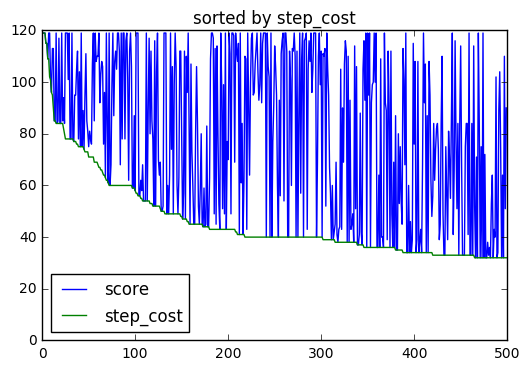

In [26]:
m = 500
plt.plot(range(0, m), D.score[0:m], label='score')
plt.plot(range(0, m), D.step_cost[0:m], label='step_cost')
plt.title('sorted by step_cost')
plt.ylim(0, 120)
plt.legend(loc=0)

In [27]:
m = 10000

In [28]:
D.shape

(16625, 6)

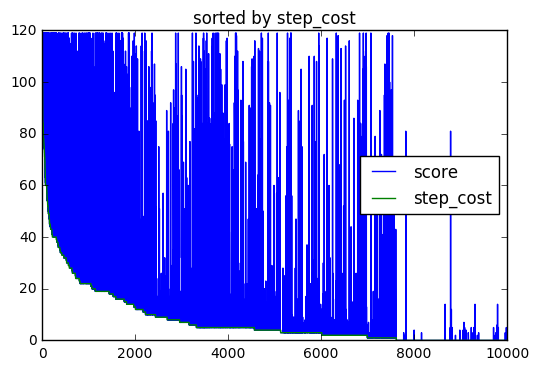

In [29]:
plt.plot(range(0, m), D.score[0:m], label='score')
plt.plot(range(0, m), D.step_cost[0:m], label='step_cost')
plt.title('sorted by step_cost')
plt.legend(loc=0)

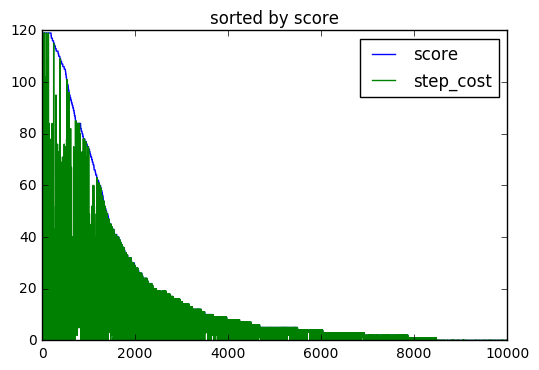

In [30]:
plt.plot(range(0, m), D1.score[0:m], label='score')
plt.plot(range(0, m), D1.step_cost[0:m], label='step_cost')
plt.title('sorted by score')
plt.legend(loc=0)

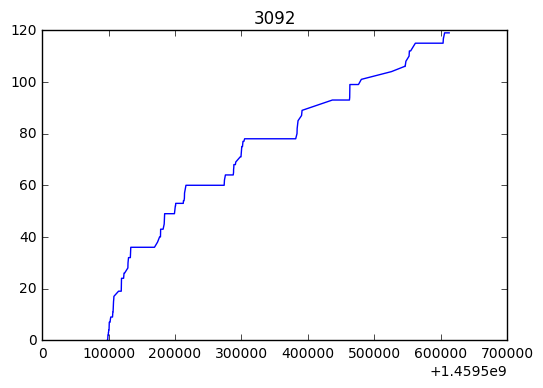

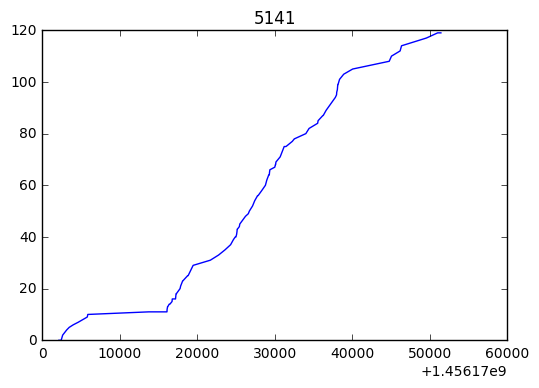

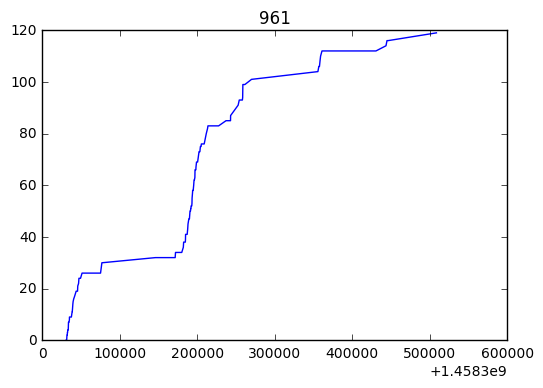

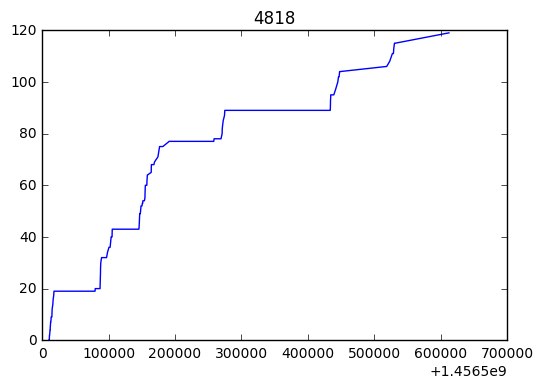

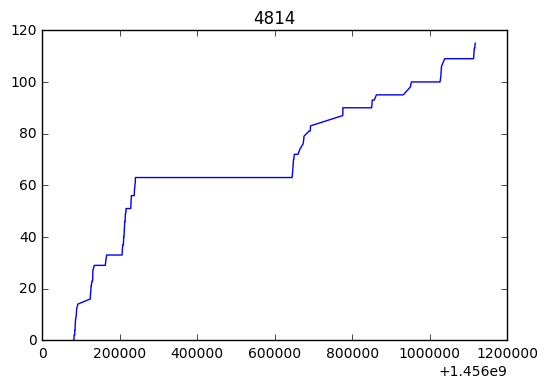

In [31]:
for i in U[:5]:
    plt.figure()
    plt.title(i)
    passes = events[(events.user_id == i) & (events.action == 'passed')]
    scores = []
    s = 0
    for c in passes.step_cost:
        s += c
        scores.append(s)
    plt.plot(passes.time, scores)

In [32]:
pd.concat([events[events.action == 'passed'].groupby('user_id').sum(), targets], axis=1).sort_values('score', ascending=False).head(5)

,step_id,time,step_cost,score,passed,distinction
user_id,,,,,,
7274,14455.0,2.848591e+09,0.0,119,1,1
1056,1348328.0,1.399226e+11,24.0,119,1,1
7686,15141.0,4.301239e+09,0.0,119,1,1
586,299867.0,6.913297e+10,5.0,119,1,1
5387,1788636.0,2.207292e+11,40.0,119,1,1


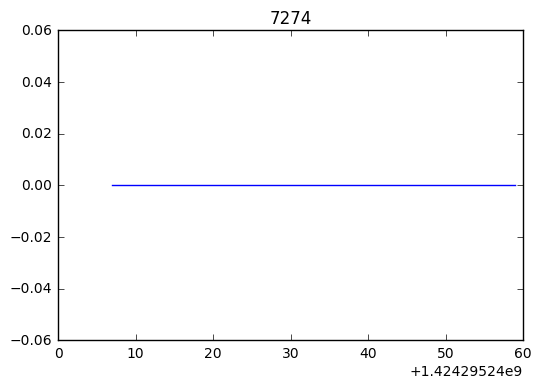

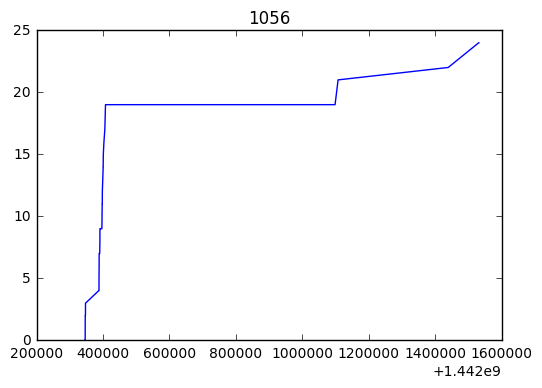

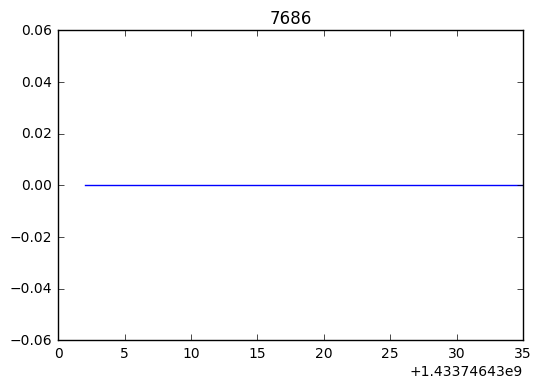

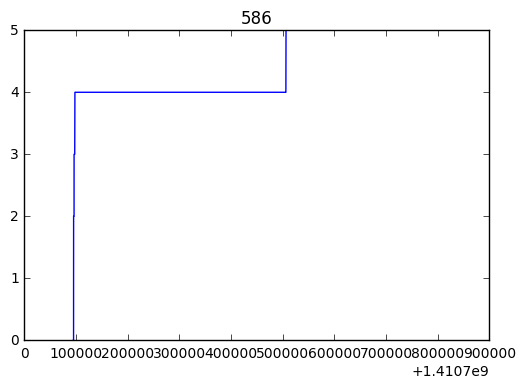

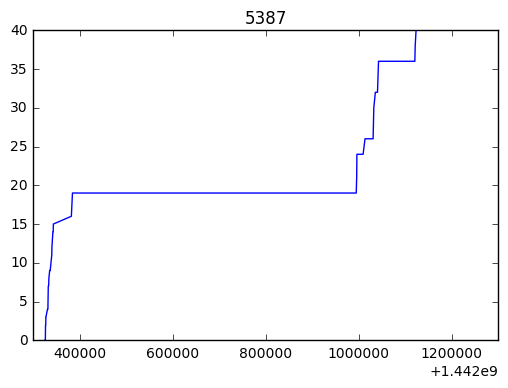

In [33]:
for i in U1[:5]:
    plt.figure()
    plt.title(i)
    passes = events[(events.user_id == i) & (events.action == 'passed')]
    scores = []
    s = 0
    for c in passes.step_cost:
        s += c
        scores.append(s)
    plt.plot(passes.time, scores)

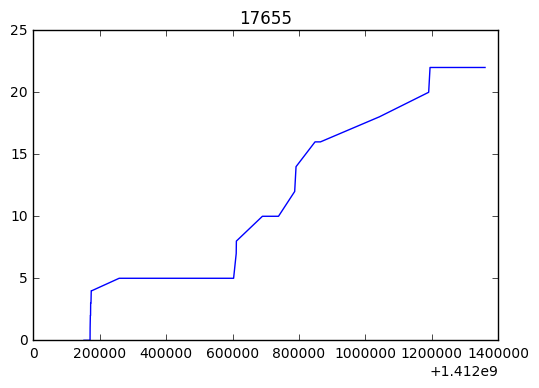

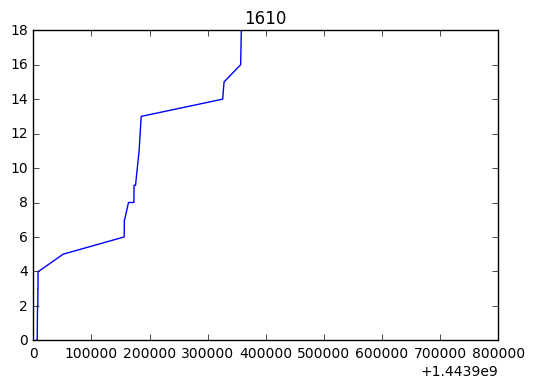

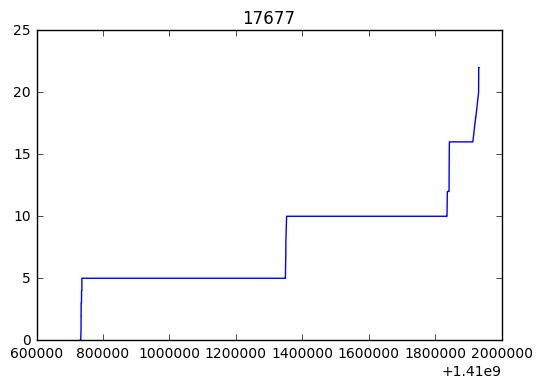

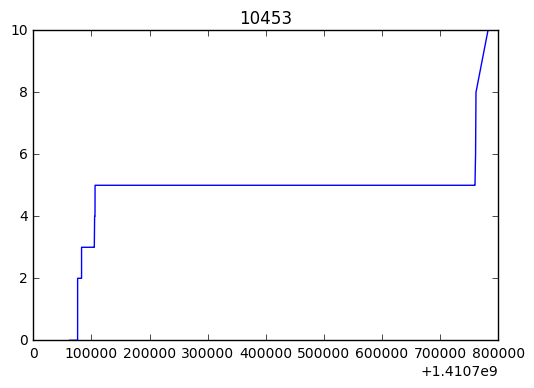

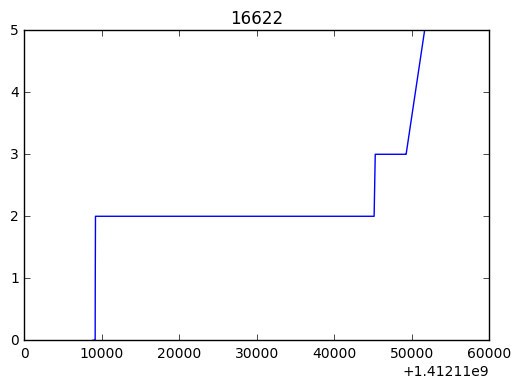

In [34]:
for i in U1[1995:2000]:
    plt.figure()
    plt.title(i)
    passes = events[(events.user_id == i) & (events.action == 'passed')]
    scores = []
    s = 0
    for c in passes.step_cost:
        s += c
        scores.append(s)
    plt.plot(passes.time, scores)

made 0–250
made 250–500
made 500–750
made 750–1000
made 1000–1250
made 1250–1500
made 1500–1750
made 1750–2000


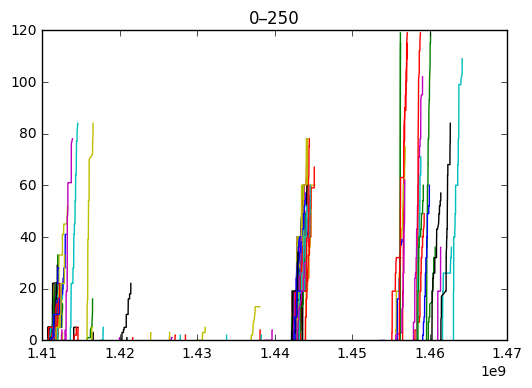

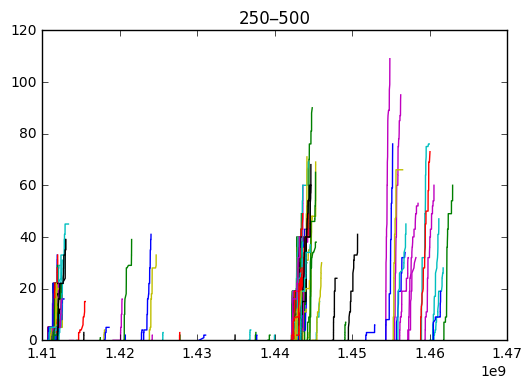

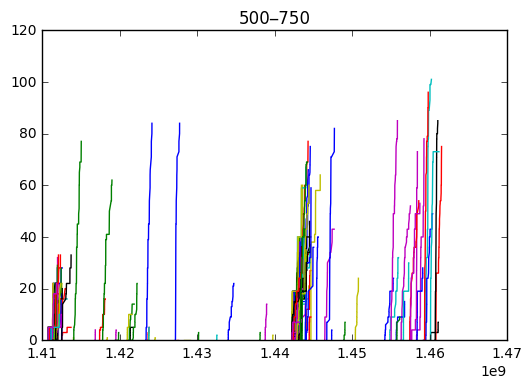

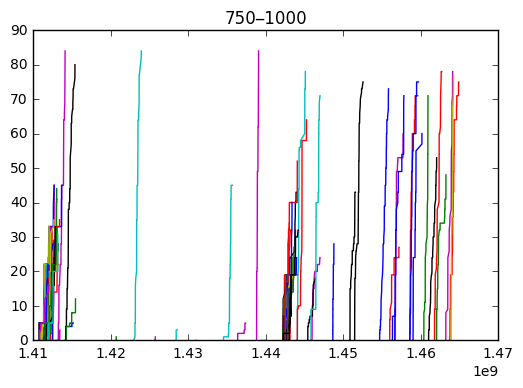

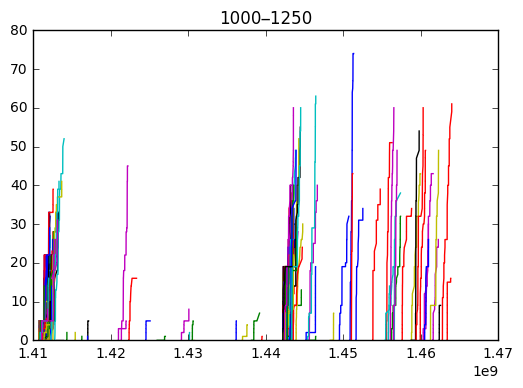

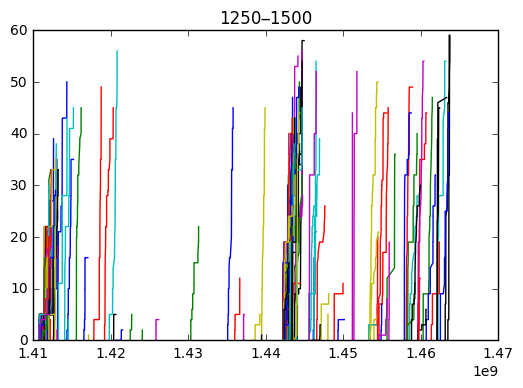

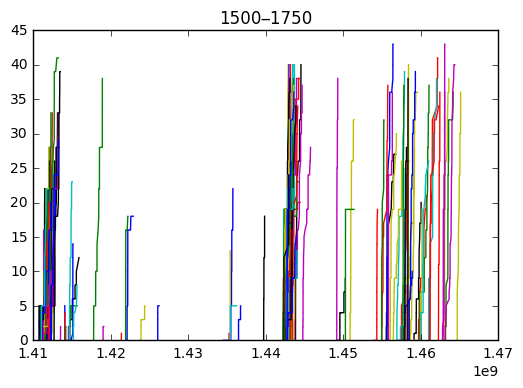

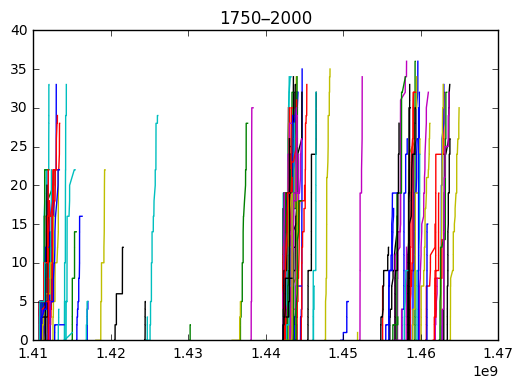

In [35]:
for j in range(0, 2000, 250):
    plt.figure()
    plt.title('{}–{}'.format(j, j + 250))
    for i in U1[j:j+250]:
        passes = events[(events.user_id == i) & (events.action == 'passed')]
        scores = []
        s = 0
        for c in passes.step_cost:
            s += c
            scores.append(s)
        plt.plot(passes.time, scores)
    print('made {}–{}'.format(j, j + 250))

In [36]:
targets.loc[U1[1999]]

score          29
passed          0
distinction     0
Name: 16622, dtype: int64

In [37]:
targets.loc[U1[0]]

score          119
passed           1
distinction      1
Name: 7274, dtype: int64

In [38]:
events[(events.user_id == U1[0]) & (events.action == 'passed')]

,user_id,action,step_id,time,step_type,step_cost
920359,7274,passed,7225,1424295247,text,0
920363,7274,passed,7230,1424295299,text,0


In [39]:
step_id_position(7225)

(1, 1, 1)

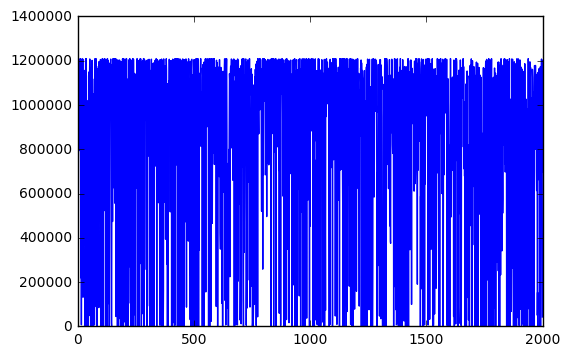

In [40]:
durations = []
for i in U1[:2000]:
    passes = events[(events.user_id == i) & (events.action == 'passed')]
    begin_time = passes.iloc[0].time
    end_time = passes.iloc[-1].time
    durations.append(end_time - begin_time)
plt.plot(durations)

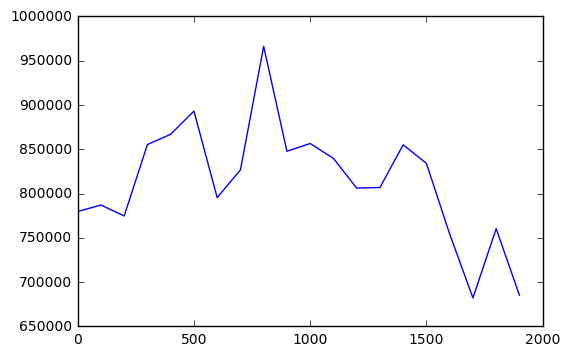

In [41]:
mean_durations = []
step = 100
for i in range(0, 2000, step):
    mean_durations.append(np.mean(durations[i:i+step]))
plt.plot(range(0, 2000, step), mean_durations)

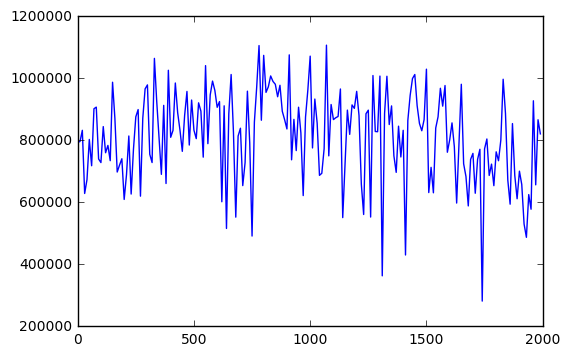

In [42]:
mean_durations = []
step = 10
for i in range(0, 2000, step):
    mean_durations.append(np.mean(durations[i:i+step]))
plt.plot(range(0, 2000, step), mean_durations)

In [43]:
pd.set_option('display.max_rows', 999)

In [44]:
r = []
ind = []
for step_id, data in sorted(list(events.groupby('step_id')), key=lambda it: step_id_position(it[0])):
    ind.append(step_id)
    metadata = structure.loc[step_id]
    r.append((len(data[data.action == 'passed']), len(data[data.action == 'discovered']), len(data[data.action == 'passed']) / len(data[data.action == 'discovered']), metadata.step_type, metadata.step_cost))
S = pd.DataFrame(r, ind, columns=['passed', 'discovered', 'pass_rate', 'step_type', 'step_cost'])
S

,passed,discovered,pass_rate,step_type,step_cost
7225,9826,9826,1.000000,text,0
7230,9360,9360,1.000000,text,0
7231,9176,9176,1.000000,text,0
7232,8981,8981,1.000000,text,0
43604,4409,4409,1.000000,text,0
7233,8783,8783,1.000000,text,0
10828,5876,5876,1.000000,text,0
2828,10956,10956,1.000000,text,0
4848,8457,8457,1.000000,video,0
4850,7915,7915,1.000000,video,0


In [46]:
pd.reset_option('display.max_rows')

In [47]:
S[S.step_cost != 0].head(50)

,passed,discovered,pass_rate,step_type,step_cost
2824,7217,8114,0.889450,choice,1
2825,6594,7832,0.841931,choice,1
2829,5957,6513,0.914632,choice,1
44097,2173,2945,0.737861,choice,1
4287,4761,5321,0.894757,choice,1
39541,2070,2444,0.846972,choice,1
39540,2096,2453,0.854464,code,1
42210,1955,2180,0.896789,code,1
4289,3966,4674,0.848524,choice,1
39598,1464,1777,0.823860,code,2


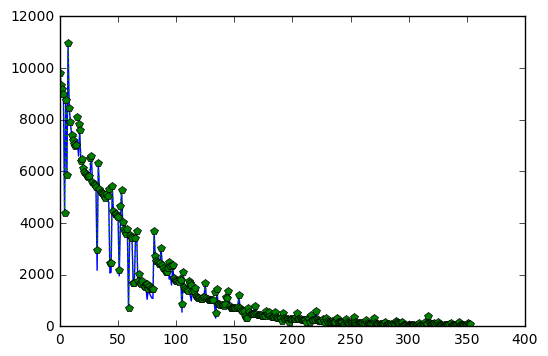

In [112]:
plt.plot(S.passed.values)
plt.plot(S.discovered.values, 'p:')

# Признаки

## Время дохождения от 0 до степа

In [51]:
step_count = len(events.step_id.unique())
step_count

354

In [52]:
normalized_id_to_step_id = dict()
last_normalized_id = 0
for step_id in events.step_id.unique():
    normalized_id_to_step_id[step_id] = last_normalized_id
    last_normalized_id += 1

In [456]:
time_diffs = defaultdict(lambda: [-1] * step_count)

passed_events_by_user = events[events.action == 'passed'].groupby('user_id')

bar = ProgressBar(max_value=len(passed_events_by_user))
for i, rows in bar(passed_events_by_user):
    start_time = rows.iloc[0].time
    for j, row in rows.iterrows():
        s_id = normalized_id_to_step_id[row.step_id]
        if time_diffs[row.user_id][s_id] == -1:
            time_diffs[row.user_id][s_id] = row.time - start_time

100% (16318 of 16318) |#####################################################################################################################| Elapsed Time: 0:01:52 Time: 0:01:52


In [457]:
max_time_diff = 0
for k, v in time_diffs.items():
    if len(v) > 0:
        for diff in v:
            if max_time_diff < diff:
                max_time_diff = diff
max_time_diff

1209596

In [458]:
users_with_ok_data = set()

for k, v in time_diffs.items():
    if len(v) > 0:
        miss_count = 0
        for i, diff in enumerate(v):
            if diff == -1:
                v[i] = math.pi * max_time_diff
                miss_count += 1
        completeness = 1 - miss_count / len(v)
        if completeness > 0.4:
            users_with_ok_data.add(k)

In [459]:
len(users_with_ok_data)

506

In [460]:
len(time_diffs)

16318

In [301]:
time_diffs_as_list = []
for k in events.user_id.unique():
    v = time_diffs[k]
    if v[0] == -1:
        v = [math.pi * max_time_diff] * len(v)
    time_diffs_as_list.append([k] + v)

In [302]:
time_diffs_as_df = pd.DataFrame(time_diffs_as_list).set_index(0)

In [303]:
time_diffs_as_df.head()

,1,2,3,4,5,6,7,8,9,10,...,345,346,347,348,349,350,351,352,353,354
0,,,,,,,,,,,,,,,,,,,,,
5920,0.000000e+00,1.000000e+01,5.800000e+01,7.100000e+01,7.700000e+01,8.200000e+01,9.200000e+01,1.040000e+02,1.120000e+02,1.180000e+02,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
1786,2.300000e+01,3.300000e+01,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
12831,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,9.520770e+05,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
7957,3.766000e+03,3.769000e+03,3.800058e+06,3.800058e+06,1.868100e+04,3.800058e+06,3.800058e+06,3.800058e+06,1.869700e+04,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
5693,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06


In [304]:
time_diffs_as_df.shape

(16625, 354)

## Время выполнения каждого степа

In [162]:
starts = defaultdict(lambda: [-1] * step_count)
steps_times = defaultdict(lambda: [-1] * step_count)

bar = ProgressBar(max_value=len(events.user_id.unique()))
for i, rows in bar(events.groupby('user_id')):
    for j, row in rows.iterrows():
        s_id = normalized_id_to_step_id[row.step_id]
        if starts[row.user_id][s_id] == -1:
            starts[row.user_id][s_id] = row.time
        elif steps_times[row.user_id][s_id] == -1:
            if row.action == 'passed':
                steps_times[row.user_id][s_id] = row.time - starts[row.user_id][s_id]

100% (16625 of 16625) |#####################################################################################################################| Elapsed Time: 0:06:50 Time: 0:06:50


In [157]:
max_step_time = 0
for k, v in steps_times.items():
    if len(v) > 0:
        for t in v:
            if max_step_time < t:
                max_step_time = t
max_step_time

1206471

In [306]:
got_zeros = [False] * step_count

for k, v in steps_times.items():
    for i, t in enumerate(v):
        if t == 0:
            got_zeros[i] = True
        elif t == -1:
            v[i] = math.pi * max_step_time

In [307]:
steps_times_as_list = []
for k in events.user_id.unique():
    v = [it for i, it in enumerate(steps_times[k]) if not got_zeros[i]]
    if v[0] == -1:
        v = [math.pi * max_step_time] * len(v)
    steps_times_as_list.append([k] + v)

In [308]:
steps_times_as_df = pd.DataFrame(steps_times_as_list).set_index(0)

In [309]:
steps_times_as_df.head()

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,,,,,,,,,,,,,,,,,,,,,
5920,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
1786,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
12831,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
7957,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
5693,2.900000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00


In [310]:
steps_times_as_df.shape

(16625, 73)

## Кол-во степов, кол-во баллов и т.д.

In [436]:
steps_stats = []
for user_id, user_events in events.groupby('user_id'):
    count = (user_events.action == 'passed').sum()
    cost = user_events[user_events.action == 'passed'].step_cost.sum()
#     try:
#         user_step_times = steps_times_as_df.loc[user_id]
#     except:
#         user_step_times = np.array([math.pi * max_step_time])
#     m = user_step_times.mean()
#     s = user_step_times.std()
    steps_stats.append((user_id, count, cost)) #, m, s))

In [437]:
steps_stats_as_df = pd.DataFrame(steps_stats).set_index(0)

In [438]:
steps_stats_as_df.head()

,1,2
0,,
1,254,0
2,9,0
3,31,9
4,66,9
6,106,26


## Склеиваем

In [439]:
all_sub_df_X = [steps_stats_as_df, time_diffs_as_df, steps_times_as_df]

In [440]:
for sub_df in all_sub_df_X:
    print(sub_df.shape)

(16625, 2)
(16625, 354)
(16625, 73)


In [441]:
X = pd.concat(all_sub_df_X, axis=1)
X.columns = [str(i) for i in range(X.shape[1])]

In [442]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,,,,,,,,,,,,,,,,,,,,,
1,254,0,3.706900e+04,2.235000e+03,2.543500e+04,1.148180e+05,2.253280e+05,2.394300e+04,3.435120e+05,2.414460e+05,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
2,9,0,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
3,31,9,1.260000e+02,3.800058e+06,3.800058e+06,1.670000e+02,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
4,66,9,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
6,106,26,1.199900e+05,1.813380e+05,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00


In [443]:
X.shape

(16625, 429)

## Y

In [444]:
Y = targets.passed.loc[X.index]

In [445]:
X.shape, Y.shape

((16625, 429), (16625,))

# Проверяем модель

In [249]:
from sklearn.metrics import f1_score
from sklearn.cross_validation import KFold
import xgboost

In [446]:
for sub_df in all_sub_df_X:
    print(sub_df.shape)

(16625, 2)
(16625, 354)
(16625, 73)


In [448]:
class StackedClassifier:
    def __init__(self):
        self.models = []
        for i in range(len(all_sub_df_X)):
            model = xgboost.XGBClassifier(max_depth=50, learning_rate=0.05, n_estimators=200, silent=False)
            self.models.append(model)
        self.supermodel = xgboost.XGBClassifier(max_depth=50, learning_rate=0.05, n_estimators=200, silent=False)
            
    def fit(self, X, y):
        predictions = []
        ind = 0
        for i, model in enumerate(self.models):
            size = all_sub_df_X[i].shape[1]
            X_part = X.values[:,ind:ind+size]
            ind += size
            model.fit(X_part, y)
            prediction = model.predict(X_part)
            predictions.append(prediction)
        self.supermodel.fit(np.array(predictions).T, y)
            
    def predict_sub(self, X):
        predictions = []
        ind = 0
        for i, model in enumerate(self.models):
            size = all_sub_df_X[i].shape[1]
            X_part = X.values[:,ind:ind+size]
            ind += size
            prediction = model.predict(X_part)
            predictions.append(prediction)
        return predictions
            
    def predict(self, X, predictions_sub=None):
        if predictions_sub is None:
            predictions_sub = self.predict_sub(X)
        return self.supermodel.predict(np.array(predictions_sub).T)

In [461]:
cv = KFold(X.shape[0], n_folds=5, shuffle=True)
scores = []
superscores = []
models = []
bar = ProgressBar(max_value=5)
for train_index, test_index in bar(cv):
    sub_df_scores = []
    sub_df_models = []
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = targets.passed.loc[train_index].astype(np.bool), targets.passed.loc[test_index].astype(np.bool)
    
    X_train = X_train.loc[users_with_ok_data].dropna()
    y_train = y_train.loc[X_train.index]
        
    model = StackedClassifier()
    model.fit(X_train, y_train)
        
    predictions_sub = model.predict_sub(X_test)
    for predictions in predictions_sub:
        score = f1_score(y_test, predictions)
        sub_df_scores.append(score)
    
    superscore = f1_score(y_test, model.predict(X_test, predictions_sub))
        
    superscores.append(superscore)
    scores.append(sub_df_scores)
    models.append(model)

100% (5 of 5) |#############################################################################################################################| Elapsed Time: 0:00:23 Time: 0:00:23


In [462]:
np.array(scores)

array([[ 0.10404624,  0.88481013,  0.0764774 ],
       [ 0.06896552,  0.91728312,  0.07971014],
       [ 0.06053551,  0.89168163,  0.07577497],
       [ 0.06958474,  0.9235589 ,  0.0700565 ],
       [ 0.07182941,  0.90605686,  0.07432432]])

In [463]:
np.array(superscores)

array([ 0.88481013,  0.91728312,  0.89168163,  0.9235589 ,  0.90605686])

# Тестовые данные

## Время дохождения от 0 до степа

In [369]:
ones_only = pd.DataFrame.from_csv('ones_only.csv', index_col='user_id')

In [370]:
ones_only.head()

,passed
user_id,
5,1
9,1
21,1
26,1
29,1


In [372]:
len(ones_only)

4255

In [358]:
events_test.head()

,user_id,action,step_id,time,step_type,step_cost
0,20698,passed,7225,1410725206,text,0
1,20698,viewed,7225,1410725206,text,0
2,20698,discovered,7225,1410725206,text,0
3,20698,passed,7230,1410725214,text,0
4,20698,discovered,7230,1410725214,text,0


In [360]:
time_diffs_test = defaultdict(lambda: [-1] * step_count)

passed_events_by_user = events_test[events_test.action == 'passed'].groupby('user_id')

bar = ProgressBar(max_value=len(passed_events_by_user))
for i, rows in bar(passed_events_by_user):
    start_time = rows.iloc[0].time
    for j, row in rows.iterrows():
        s_id = normalized_id_to_step_id[row.step_id]
        if time_diffs_test[row.user_id][s_id] == -1:
            time_diffs_test[row.user_id][s_id] = row.time - start_time

100% (4180 of 4180) |#######################################################################################################################| Elapsed Time: 0:00:28 Time: 0:00:28


In [361]:
len(time_diffs_test.keys())

4180

In [373]:
for user_id in ones_only.index:
    if user_id not in time_diffs_test:
        time_diffs_test[user_id][0] = -1

In [374]:
len(time_diffs_test.keys())

4255

In [375]:
time_diffs_as_list_test = []
for k, v in time_diffs_test.items():
    time_diffs_as_list_test.append([k] + v)

In [376]:
time_diffs_as_df_test = pd.DataFrame(time_diffs_as_list_test).set_index(0).loc[ones_only.index].fillna(-1).applymap(lambda it: math.pi * max_time_diff if it == -1 else it)

In [377]:
time_diffs_as_df_test.head()

,1,2,3,4,5,6,7,8,9,10,...,345,346,347,348,349,350,351,352,353,354
user_id,,,,,,,,,,,,,,,,,,,,,
5,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
9,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
21,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,0.000000e+00,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
26,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06
29,9.666400e+04,1.357370e+05,2.252000e+05,2.287330e+05,2.300040e+05,2.307160e+05,2.427820e+05,2.432810e+05,2.455970e+05,3.200000e+01,...,3.291080e+05,3.330510e+05,3.475570e+05,3.487970e+05,3.502520e+05,6.824100e+04,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06


In [378]:
time_diffs_as_df_test.shape

(4255, 354)

## Время выполнения каждого степа

In [379]:
starts_test = defaultdict(lambda: [-1] * step_count)
steps_times_test = defaultdict(lambda: [-1] * step_count)

bar = ProgressBar(max_value=len(events_test.user_id.unique()))
for i, rows in bar(events_test.groupby('user_id')):
    for j, row in rows.iterrows():
        s_id = normalized_id_to_step_id[row.step_id]
        if starts_test[row.user_id][s_id] == -1:
            starts_test[row.user_id][s_id] = row.time
        elif steps_times_test[row.user_id][s_id] == -1:
            if row.action == 'passed':
                steps_times_test[row.user_id][s_id] = row.time - starts_test[row.user_id][s_id]

100% (4255 of 4255) |#######################################################################################################################| Elapsed Time: 0:01:55 Time: 0:01:55


In [380]:
steps_times_as_list_test = []
for k in ones_only.index:
    v = [it for i, it in enumerate(steps_times_test[k]) if not got_zeros[i]]
    if v[0] == -1:
        v = [math.pi * max_step_time] * len(v)
    steps_times_as_list_test.append([k] + v)

In [381]:
steps_times_as_df_test = pd.DataFrame(steps_times_as_list_test).set_index(0)

In [384]:
steps_times_as_df_test.head()

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,,,,,,,,,,,,,,,,,,,,,
5,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
9,7.000000e+01,7.900000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
21,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
26,1.700000e+01,2.300000e+01,1.300000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
29,5.800000e+01,6.500000e+01,3.600000e+01,2.708000e+03,9.720000e+02,1.507000e+03,8.730000e+02,7.350000e+02,2.190000e+02,1.239000e+03,...,6.500000e+01,1.664000e+03,2.230000e+02,1.890000e+02,1.930000e+02,2.023000e+03,3.470000e+02,1.148000e+03,3.680000e+02,-1.000000e+00


In [385]:
steps_times_as_df_test.shape

(4255, 73)

## Кол-во степов, кол-во баллов и т.д.

In [471]:
steps_stats_test = []
for user_id, user_events in events_test.groupby('user_id'):
    count = (user_events.action == 'passed').sum()
    cost = user_events[user_events.action == 'passed'].step_cost.sum()
#     try:
#         user_step_times = steps_times_as_df_test.loc[user_id]
#     except:
#         user_step_times = np.array([math.pi * max_step_time])
#     m = user_step_times.mean()
#     s = user_step_times.std()
    steps_stats_test.append((user_id, count, cost)) #, m, s))

In [472]:
steps_stats_as_df_test = pd.DataFrame(steps_stats_test).set_index(0)

In [473]:
steps_stats_as_df_test.head()

,1,2
0,,
5,1,0
9,18,2
21,4,0
26,14,3
29,275,78


In [474]:
steps_stats_as_df_test.shape

(4255, 2)

In [475]:
len(steps_stats_as_df_test.loc[ones_only.index])

4255

## Склеиваем

In [476]:
all_sub_df_X_test = [steps_stats_as_df_test, time_diffs_as_df_test, steps_times_as_df_test]

In [477]:
for sub_df in all_sub_df_X_test:
    print(sub_df.shape)

(4255, 2)
(4255, 354)
(4255, 73)


In [478]:
X_test = pd.concat(all_sub_df_X_test, axis=1)
X_test.columns = [str(i) for i in range(X_test.shape[1])]

In [479]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,,,,,,,,,,,,,,,,,,,,,
5,1,0,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
9,18,2,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
21,4,0,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,0.000000e+00,3.800058e+06,3.800058e+06,...,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06,3.790240e+06
26,14,3,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,3.800058e+06,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
29,275,78,9.666400e+04,1.357370e+05,2.252000e+05,2.287330e+05,2.300040e+05,2.307160e+05,2.427820e+05,2.432810e+05,...,6.500000e+01,1.664000e+03,2.230000e+02,1.890000e+02,1.930000e+02,2.023000e+03,3.470000e+02,1.148000e+03,3.680000e+02,-1.000000e+00


In [480]:
X_test.shape

(4255, 429)

In [481]:
X.shape, Y.shape

((16625, 429), (16625,))

# Ответ

In [482]:
len(users_with_ok_data)

506

In [483]:
model = StackedClassifier()
model.fit(X.loc[users_with_ok_data], Y.loc[users_with_ok_data])

In [484]:
def create_submission(X, name='submission'):
    np.savetxt('{}.csv'.format(name), X, delimiter=',', fmt="%d", header='user_id,passed', comments='')

In [485]:
ans = model.predict(X_test)
result = np.concatenate((np.asarray(ones_only.index, dtype=int).reshape(-1, 1), np.asarray(ans, dtype=int).reshape(-1, 1)), axis=1)
create_submission(result)